# College Clustering using KMeans Algorithm
### Use KMeans Clustering to cluster Universities into to two groups, Private and Public.

In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data as a dataframe
df = pd.read_csv('College_Data')

In [3]:
# Checking basic information about the data.
df.head() # 'Private' is the Target Variable to be clustered.

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
Features = df.drop('Private', axis = 1)

In [9]:
Features.head() # We are going to use this data for Clustering

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Exploratory Data Analysis

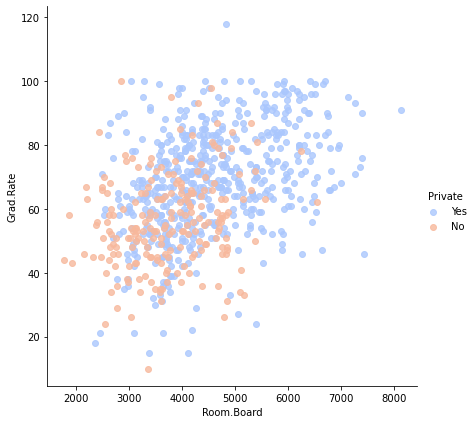

In [10]:
sns.lmplot(y = 'Grad.Rate', x = 'Room.Board',hue = 'Private', data = df, fit_reg = False, size = 6, aspect=1,
          palette='coolwarm')

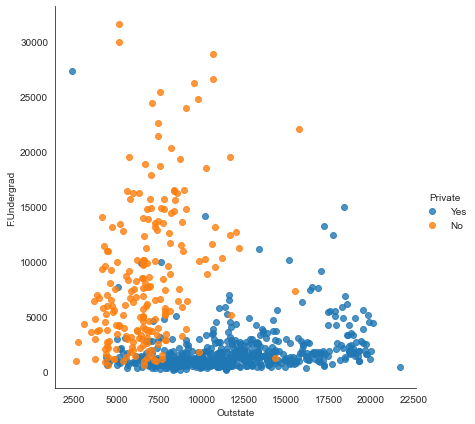

In [11]:
sns.set_style('white')
sns.lmplot(x = 'Outstate', y = 'F.Undergrad',hue = 'Private', data = df, fit_reg = False, size = 6, aspect=1)

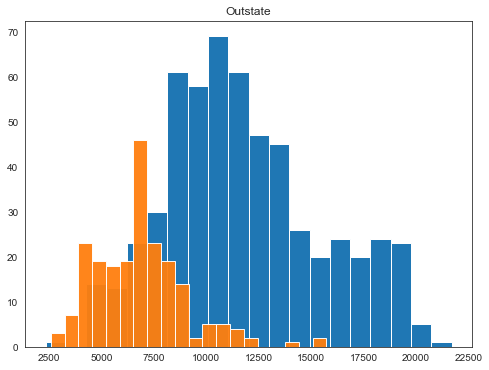

In [12]:
sns.set_style('white')
plt.figure(figsize=(8,6))
plt.hist(df[df['Private'] == 'Yes']['Outstate'], alpha = 1, bins = 20)
plt.hist(df[df['Private'] == 'No']['Outstate'], alpha = 0.95, bins = 20)
plt.title('Outstate')
plt.show()

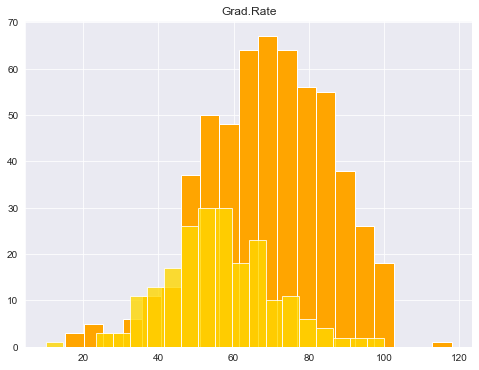

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.hist(df[df['Private'] == 'Yes']['Grad.Rate'], alpha = 1, bins = 20, color='orange')
plt.hist(df[df['Private'] == 'No']['Grad.Rate'], alpha = 0.8, bins = 20, color = 'gold')
plt.title('Grad.Rate')
plt.show()

In [14]:
print(df[df['Grad.Rate'] > 100].index)
df.iloc[95]['Grad.Rate'] = 100

Int64Index([95], dtype='int64')


## Model Building

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Features)

KMeans(n_clusters=2)

In [16]:
predictions = kmeans.labels_

In [17]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [18]:
def converter(x):
    if x == 'Yes':
        return 0
    else:
        return 1

In [19]:
priv = df['Private'].apply(converter)
priv[:5]

0    0
1    0
2    0
3    0
4    0
Name: Private, dtype: int64

<Figure size 432x288 with 0 Axes>

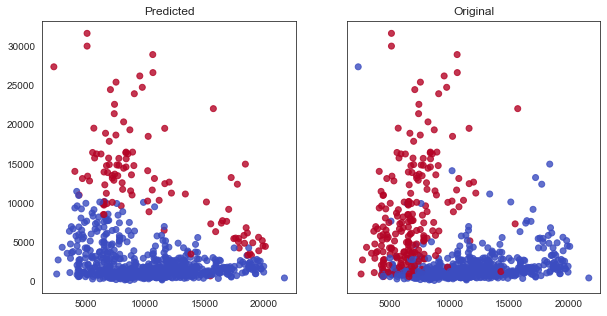

In [20]:
sns.set_style('white')
plt.set_cmap('coolwarm')
f, a = plt.subplots(1,2, figsize=(10,5), sharey = True)
a[0].set_title('Predicted')
a[0].scatter(Features['Outstate'], Features['F.Undergrad'], c = predictions, alpha=0.8)
a[1].set_title('Original')
a[1].scatter(Features['Outstate'], Features['F.Undergrad'], c = priv, alpha=0.8)

In [21]:
print(confusion_matrix(predictions, priv))
print('\n')
print(classification_report(predictions, priv))
print('Accuracy: ', accuracy_score(predictions, priv))

[[531 138]
 [ 34  74]]


              precision    recall  f1-score   support

           0       0.94      0.79      0.86       669
           1       0.35      0.69      0.46       108

    accuracy                           0.78       777
   macro avg       0.64      0.74      0.66       777
weighted avg       0.86      0.78      0.81       777

Accuracy:  0.7786357786357786
